# Table of Contents
 <p><div class="lev1 toc-item"><a href="#What-is-Probability-Theory?" data-toc-modified-id="What-is-Probability-Theory?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>What is Probability Theory?</a></div><div class="lev2 toc-item"><a href="#A-simple-(?)-question" data-toc-modified-id="A-simple-(?)-question-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A simple (?) question</a></div><div class="lev2 toc-item"><a href="#Simulating-coin-flips" data-toc-modified-id="Simulating-coin-flips-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simulating coin flips</a></div><div class="lev2 toc-item"><a href="#Summary" data-toc-modified-id="Summary-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Summary</a></div><div class="lev1 toc-item"><a href="#What-is-probability-theory?" data-toc-modified-id="What-is-probability-theory?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is probability theory?</a></div><div class="lev1 toc-item"><a href="#Exercises:" data-toc-modified-id="Exercises:-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exercises:</a></div><div class="lev2 toc-item"><a href="#Exercise-1:" data-toc-modified-id="Exercise-1:-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Exercise 1:</a></div><div class="lev2 toc-item"><a href="#Exercise-2:" data-toc-modified-id="Exercise-2:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Exercise 2:</a></div><div class="lev2 toc-item"><a href="#Estimate-vs.-True-Probability" data-toc-modified-id="Estimate-vs.-True-Probability-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Estimate vs. True Probability</a></div>

<font size="4" style="color:red;"> **IMPORTANT: ** Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>



In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# What is Probability Theory?

* Probability Theory is a **mathematical** framework for computing the probability of complex events.

* Under the assumption that **we know the probabilities of the basic events.**

* What is the precise meaning of <font color='red'>"probability"</font> and <font color='red'>"event"</font>?

* We will give precise definitions later in the class. 

* For now, we'll rely on common sense.

## A simple (?) question
We all know that if one flips a fair coin then the outcome is "heads" or "tails" with equal probabilities.

What does that mean? 

It means that if we flip the coin $k$ times, for some large value of $k$, say $k=10,000$, 

Then the number of "heads" is **about** $\frac{k}{2}=\frac{10,000}{2} = 5,000$

What do we mean by **about** ??

## Simulating coin flips

We will use the pseudo random number generators in `numpy` to simulate the coin flips. 

instead of "Heads" and "Tails" we will use $x_i=1$ or $x_i=-1$ and consider the sum $S_{10000} = x_1+x_2+\cdots+x_{10000}$.

If the number of heads is about 5,000 then $S_{10000}\approx 0$

We will vary the number of coin flips, which we denote by $k$

In [2]:
# Generate the sum of k coin flips, repeat that n times
def generate_counts(k=1000,n=100):
    X=2*(random.rand(k,n)>0.5)-1  # generate a kXn matrix of +-1 random numbers
    S=sum(X,axis=0) 
    return S 

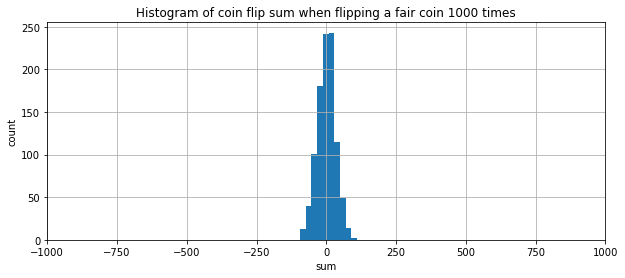

In [3]:
k=1000
n=1000
counts=generate_counts(k=k,n=n)
figure(figsize=[10,4])
hist(counts);
xlim([-k,k])
xlabel("sum")
ylabel("count")
title("Histogram of coin flip sum when flipping a fair coin %d times"%k)
grid()

Note that the sum $S_{1000}$ is not **exactly** $0$, it is only **close to** $0$.

Using **probability theory** we can calculate **how small** is $\big|S_k\big|$

In a later lesson we will show that the probability that 
$$\big| S_k \big| \geq 4\sqrt{k}$$
is smaller than $2 \times 10^{-8}$ which is $0.000002\%$

Let's use our simulation to demonstrate that this is the case:

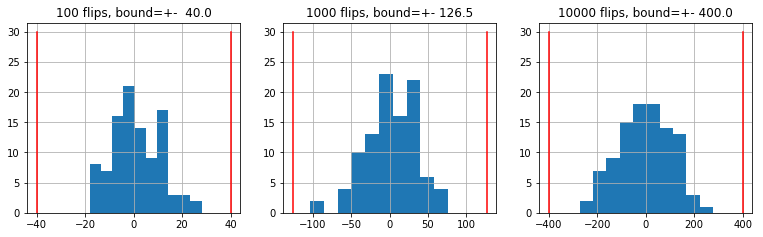

In [4]:
from math import sqrt
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


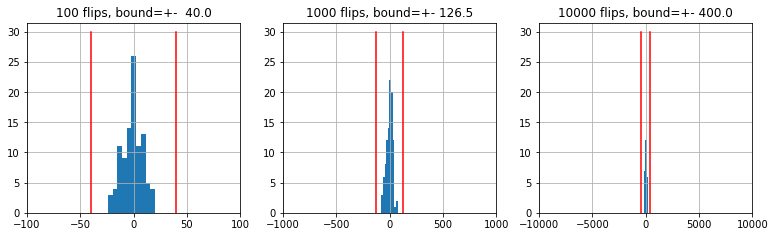

In [5]:
figure(figsize=[13,3.5])
for j in range(2,5):
    k=10**j
    counts=generate_counts(k=k,n=100)
    subplot(130+j-1)
    hist(counts,bins=10);
    xlim([-k,k])
    d=4*sqrt(k)
    plot([-d,-d],[0,30],'r')
    plot([+d,+d],[0,30],'r')
    grid()
    title('%d flips, bound=+-%6.1f'%(k,d))


## Summary
We did some experiments summing $k$ random numbers: $S_k=x_1+x_2+\cdots+x_k$

$x_i=-1$ with probability $1/2$, $x_i=+1$ with probability $1/2$

Our experiments show that the sum $S_k$ is (almost) always in the range $\big[-4\sqrt{k},+4\sqrt{k}\big]$ 


$$\mbox{ If } k \to \infty,\;\;\; \frac{4 \sqrt{k}}{k} = \frac{4}{\sqrt{k}} \to 0$$

$$ \mbox{Therefor if }\;\;k \to \infty,  \frac{S_k}{k} \to 0$$

# What is probability theory?
It is the math involved in **proving** (a precise version of) the statements above.

In most cases, we can **approximate** probabilities using simulations (Monte-Carlo simulations)

Calculating the probabilities is better because:

* It provides a precise answer

* It is much faster than Monte Carlo simulations.

** <font size=4 > Up Next: What is Statistics ?</font> **

# Exercises:

In this excercise you will write code to estimate the probability that $n$ flips of a fair coin will result in number of `"heads"` between $k_1$ and $k_2$.

You should write the body of two functions:
1. **`seq_sum`**: generates a random sequence of coin flips and counts the number of heads.
2. **`estimate_prob`**: Using calls to `seq_sum`, estimate the probability of the number of heads being between $k_1$ and $k_2$. 


## Exercise 1:

Write a function, **seq_sum**, which generates $n$ random coin flips from a fair coin and then returns the number of heads. The output type should be as numpy integer, **hint:** use `random.rand()` . 

<font  style="color:blue"> * **Code:** *</font>
```python
x = seq_sum(100)
print x
print type(x)
```


<font  style="color:magenta"> * **Output:** *</font>
```
49
<type 'numpy.int64'>
```

In [6]:
# modify this cell

def seq_sum(n):
    """ input: n, generate a sequence of n random coin flips
        output: return the number of heads 
        Hint: For simplicity, use 1,0 to represent head,tails
    """
    ### BEGIN SOLUTION
    return sum(random.rand(n)>0.5)
    ### END SOLUTION

In [62]:
# this is a small sanity check test
x = seq_sum(100)
print x
assert 'numpy.int' in str(type(x)) 

51


## Exercise 2:

Write a function, **estimate_prob**, that uses **seq_sum** to estimate the following probability:

$$ P(\; k_1 <= \text{number of heads in $n$ flips} < k_2 ) $$

The function should estimate the probability by running $m$ different trials of **`seq_sum(n)`**. In order to receive full credit **estimate_prob** MUST call **seq_sum** (aka: seq_sum is located inside estimate_prob function)

<font  style="color:blue"> * **Code:** *</font>
```python
x = estimate_prob(100,45,55,1000)
print x
print type(x)
```

<font  style="color:magenta"> * **Output:** *</font>
```
0.686
<type 'float'>
```

In [63]:

def estimate_prob(n,k1,k2,m):
    """Estimate the probability that n flips of a fair coin result in k1 to k2 heads
         n: the number of coin flips (length of the sequence)
         k1,k2: the trial is successful if the number of heads is 
                between k1 and k2-1
         m: the number of trials (number of sequences of length n)
         
         output: the estimated probability 
         """
    ### BEGIN SOLUTION
    count=0.0
    for i in range(m):
        s=seq_sum(n)
        if s>=k1 and s<k2:
            count+=1
    return count/m
    ### END SOLUTION

In [65]:
# this is a small sanity check test
x = estimate_prob(100,45,55,1000)
print x
assert 'float' in str(type(x))

0.676


## Estimate vs. True Probability

* We can now check how to see how close these estimates are to the true probabilities.

* The functions below are used to calculate the actual probabilities and to test code.

In [24]:
def calc_prob(n,k1,k2):
    """Calculate the probability using a normal approximation"""
    n=float(n);k1=float(k1);k2=float(k2)
    z1=(k1-0.5*n)/(sqrt(n)/2)
    z2=(k2-0.5*n)/(sqrt(n)/2)
    return (erf(z2/sqrt(2))-erf(z1/sqrt(2)))/2

from math import erf,sqrt
def evaluate(n,q1,q2,m,r=100):
    """Run calc_range many times and test whether the estimates are consistent with calc_prob"""
    k1=int(q1*n)
    k2=int(q2*n)
    p=calc_prob(n,k1,k2)
    std=sqrt(p*(1-p)/m)
    print 'computed prob=%5.3f, std=%5.3f'%(p,std)

    L=[estimate_prob(n,k1,k2,m) for i in range(r)]
    med=np.median(L)
    print 'ran estimator %d times, with parameters n=%d,k1=%d,k2=%d,m=%d'%(r,n,k1,k2,m)
    print 'median of estimates=%5.3f, error of median estimator=%5.3f, std= %f5.3'%(med,med-p,std)
    return L,med,p,std,abs((med-p)/std)

In [27]:
def test_report_assert(n,q1,q2,m,r=100):
    k1=int(q1*n)
    k2=int(q2*n)
    L,med,p,std,norm_err=evaluate(n,q1,q2,m,r=100)
    hist(L);
    plot([p,p],plt.ylim(),'r',label='true prob')
    plot([med,med],plt.ylim(),'k',label='median of %d estimates'%r)
    mid_y=mean(plt.ylim())
    plot([p-std,p+std],[mid_y,mid_y],'g',label='+-std')
    legend();
    print 'normalized error of median=',norm_err,'should be <1.0'
    title('r=%d,n=%d,k1=%d,k2=%d,m=%d,\nnorm_err=%4.3f'%(r,n,k1,k2,m,norm_err))
    assert norm_err<1.0

* We now test your functions. The graphs below show how close your estimated probability is to the true probability for various values of $k_1$ and $k_2$. You can see that your answer is never exactly the correct probability. 

* For full credit, the code below must run without error.


#### test no. 1
computed prob=0.954, std=0.021
ran estimator 100 times, with parameters n=100,k1=40,k2=60,m=100
median of estimates=0.950, error of median estimator=-0.004, std= 0.0208405.3
normalized error of median= 0.215919656345 should be <1.0

#### test no. 2
computed prob=0.159, std=0.037
ran estimator 100 times, with parameters n=100,k1=55,k2=100,m=100
median of estimates=0.180, error of median estimator=0.021, std= 0.0365355.3
normalized error of median= 0.584220469947 should be <1.0

#### test no. 3
computed prob=0.146, std=0.035
ran estimator 100 times, with parameters n=100,k1=47,k2=49,m=100
median of estimates=0.140, error of median estimator=-0.006, std= 0.0353595.3
normalized error of median= 0.183463908895 should be <1.0

#### test no. 4
computed prob=1.000, std=0.000
ran estimator 100 times, with parameters n=1000,k1=400,k2=600,m=100
median of estimates=1.000, error of median estimator=0.000, std= 0.0000025.3
normalized error of median= 0.000159362119343 should be <1.0

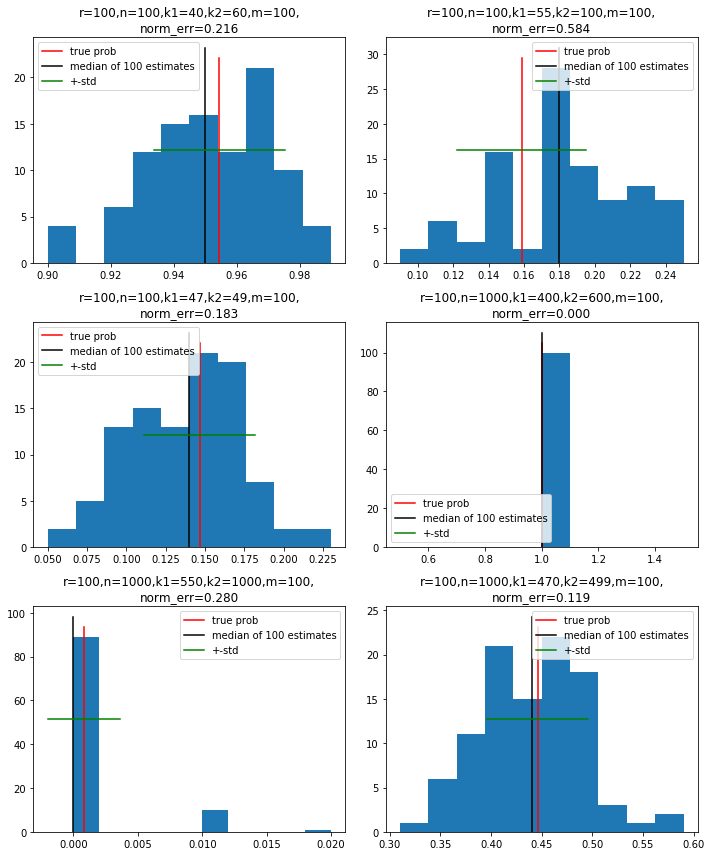

In [37]:
m=100
i=1
figure(figsize=[10,12])
for n in [100,1000]:
    for q1,q2 in [(0.4,0.6),(0.55,1.00),(0.47,0.499)]:
        fig=subplot(3,2,i)
        print;print '#### test no.',i
        i+=1
        test_report_assert(n,q1,q2,m,r=100)
tight_layout()

In [67]:
def seq_sum(n):
    #Log.append(n)
    s=sum(random.rand(n)>0.5)
    Log.append((n,s))
    return s

n,k1,k2,m = 100,45,50,1000
for r in range(10):
    Log=[]
    a=estimate_prob(n,k1,k2,m)
    b=float(sum([(s>=k1 and s<k2) for n,s in Log]))/m
    n_correct=sum(nn==100 for nn,s in Log)
    assert a==b, "estimate is incorrect. should be %4f, instead is %4f"%(b,a)
    assert m==len(Log), 'should call seq_sum %d times, called it %d times'%(m,len(Log))
    assert m==n_correct, 'the parameter n should be %d but sometimes it was not.'%n
    
print "all good!"

all good!
